# Моменты изображения
Рассчитаем разницу между моментами двух изображений для определения совпадения объекта на них

* Изображение: https://video.ittensive.com/machine-vision/feet.example.jpg
* Данные: https://video.ittensive.com/machine-vision/feet_up.zip

![Моменты](hu.png)

### Подключение библиотек

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Загрузка изображений

In [3]:
pattern = cv2.imread("feet.example.jpg")
image = cv2.imread("feet_up/0df7046b-8678-4db6-bdf0-5a0155e8607c.jfif.jpg")

In [4]:
def show_image (img, gray=False):
    fig = plt.figure(figsize=(16,8))
    plt.axis("off")
    if gray:
        plt.imshow(img, cmap="Greys")
    else:
        plt.imshow(img[...,::-1])
    plt.show()

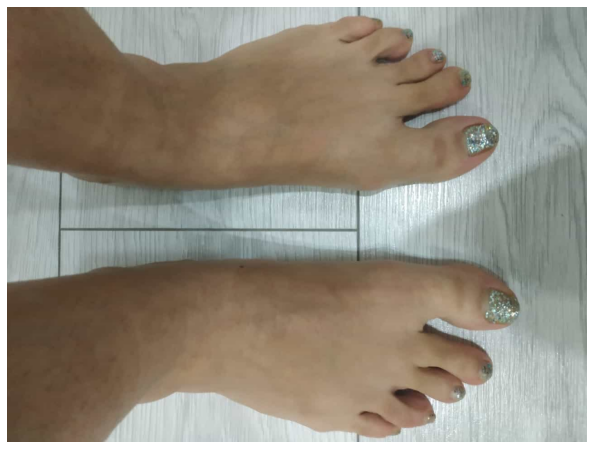

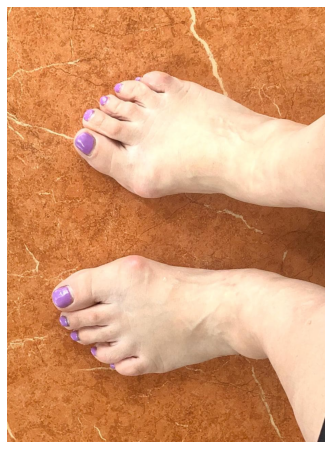

In [5]:
show_image(image)
show_image(pattern)

### Фильтрация изображения

In [6]:
def filter_image (img):
    img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (300,300))
    return img

In [7]:
pattern_thresh = filter_image(pattern)
image_thresh = filter_image(image)

### Вычисление моментов
Взвешенные суммы яркости пикселей инвариантны для смещений, поворотов и изменения масштаба
* 1 тип - среднее гармоническое разности моментов
* 2 тип - сумма разности моментов
* 3 тип - нормированная сумма разности моментов

In [9]:
%%time
d1 = cv2.matchShapes(pattern_thresh, image_thresh, cv2.CONTOURS_MATCH_I1, 0)
d2 = cv2.matchShapes(pattern_thresh, image_thresh, cv2.CONTOURS_MATCH_I2, 0)
d3 = cv2.matchShapes(pattern_thresh, image_thresh, cv2.CONTOURS_MATCH_I3, 0)
if d1+d2+d3 < 1:
    print ("Изображения похожи")
else:
    print ("Изображения разные")

Изображения похожи
Wall time: 1.98 ms
